<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame



###1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2. Entender el estado de los datos, para ello puedo emplear los comandos básicos del pandas

df.info()
df.describe()
df.isnull().sum()
df.isna().sum()
Estos dos últimos son equivalentes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#quitar los nan
df.dropna(inplace=True)

###3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

###4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [ ]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]

df1=df[cols].groupby(df['ocean_proximity']).mean()
df1

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


###5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [ ]:
import seaborn as sns

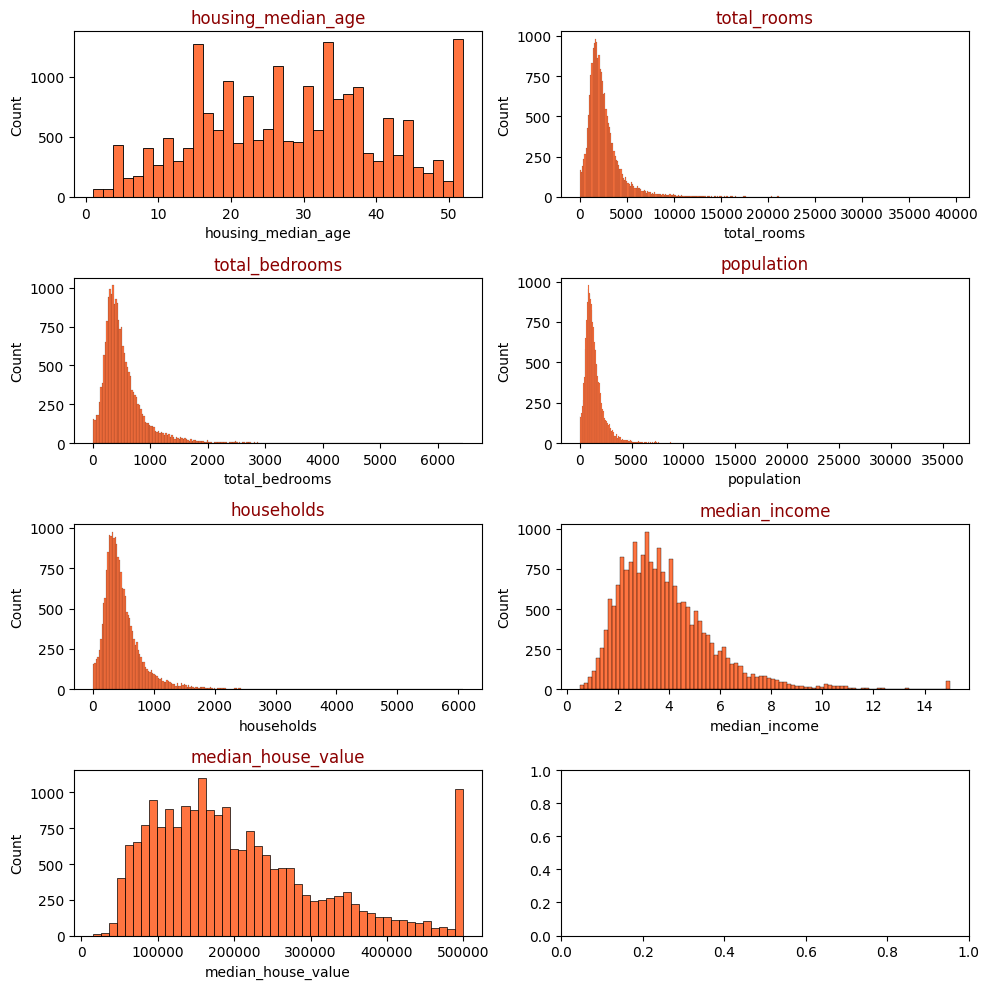

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(10,10))
for i, col in enumerate(cols):
  sns.histplot(data=df, x=col, ax=axs[i//2, i%2],color='orangered')
  axs[i//2, i%2].set_title(col,color='darkred')
plt.tight_layout()
plt.show()

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [ ]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


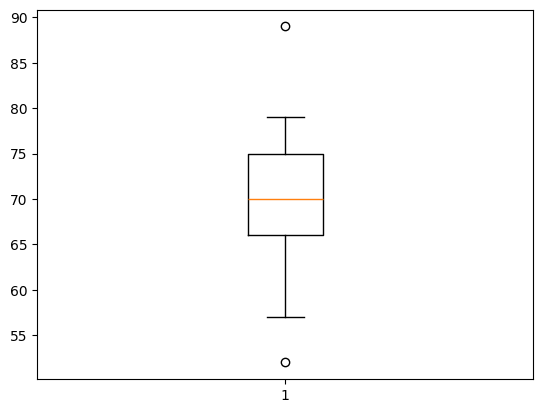

In [ ]:
IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)
plt.show()

### 6. Eliminar outliers

In [ ]:
def remove_outliers(df, column):
  df_filtered = pd.DataFrame()
  for group_name, group_df in df.groupby('ocean_proximity'):
    Q1 = group_df[column].quantile(0.25)
    Q3 = group_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group_df_filtered = group_df[(group_df[column] >= lower_bound) & (group_df[column] <= upper_bound)]
    df_filtered = pd.concat([df_filtered, group_df_filtered])
  return df_filtered

df_no_outliers = remove_outliers(df, 'median_house_value')

###7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

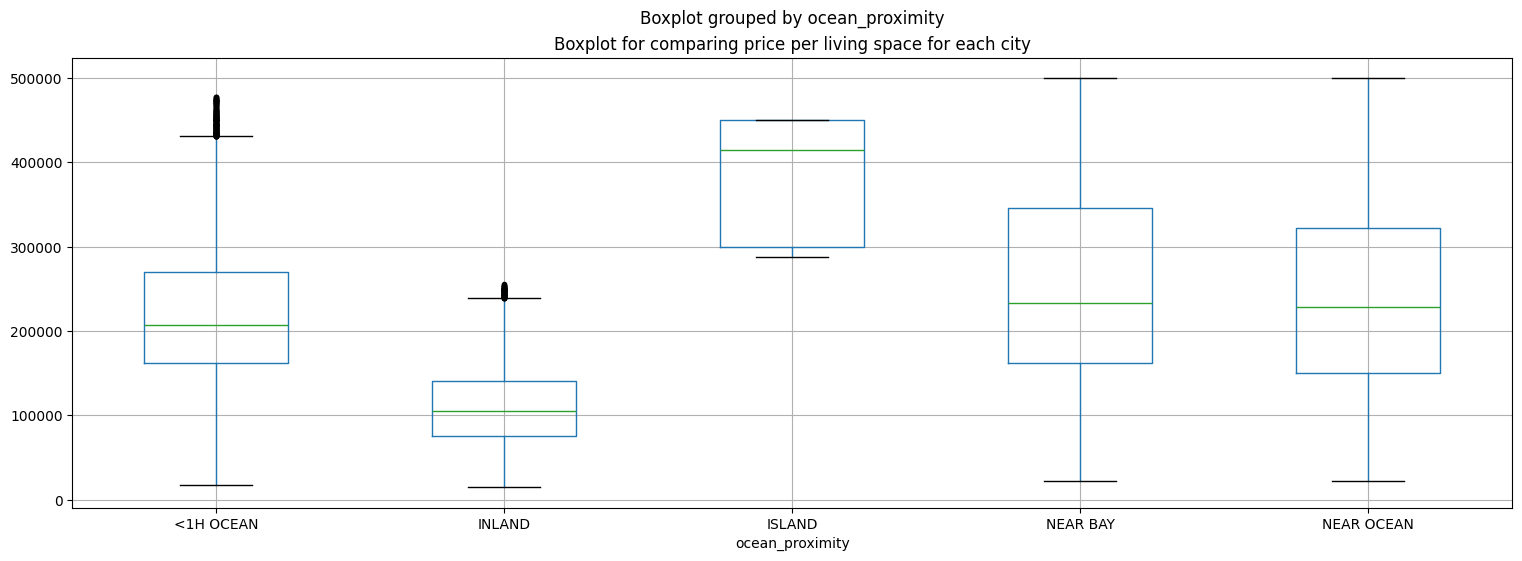

In [ ]:
# draw boxplot
df_no_outliers.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

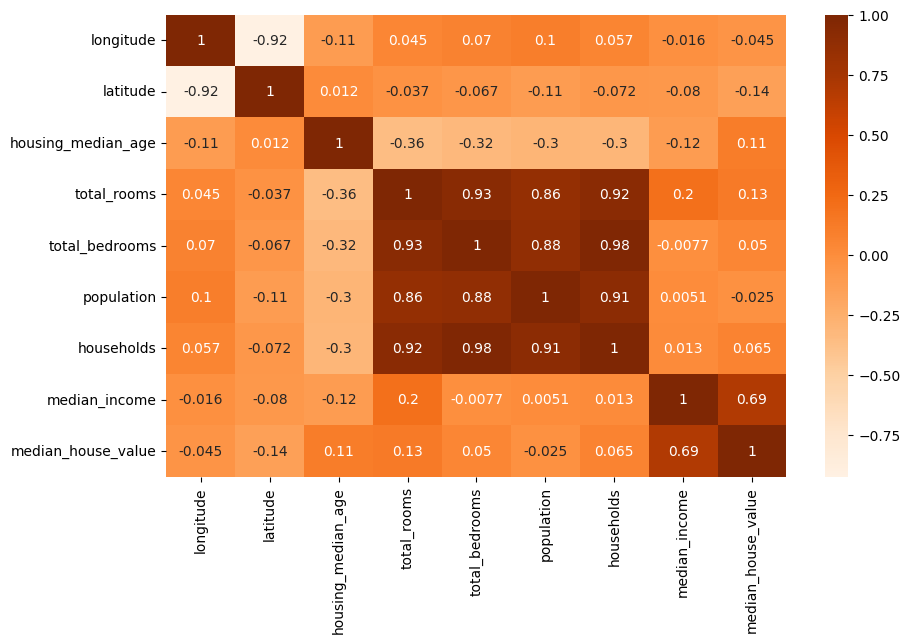

In [ ]:
df2 = df.drop('ocean_proximity', axis=1)
corr_matrix = df2.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "Oranges", center=0)
plt.show()

###9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

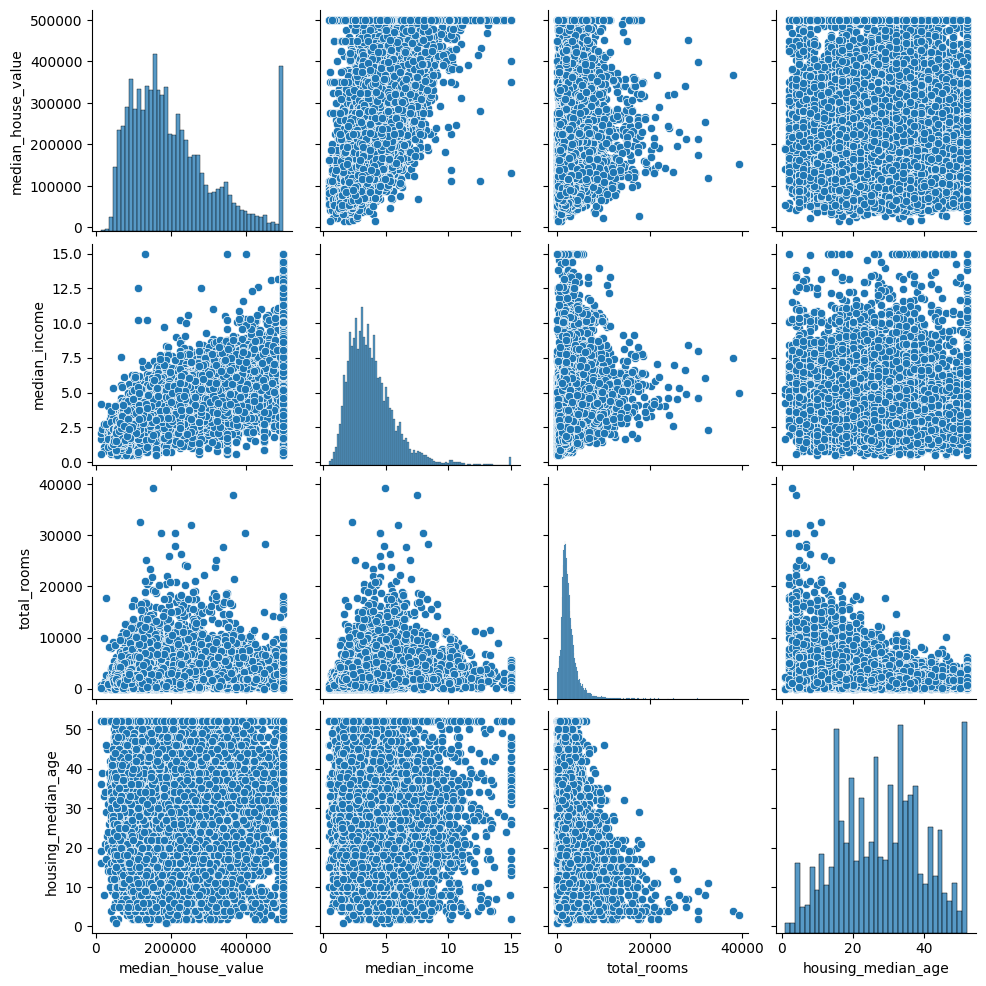

In [ ]:
cols2 = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols2])
plt.show()

###10. Realiza un scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

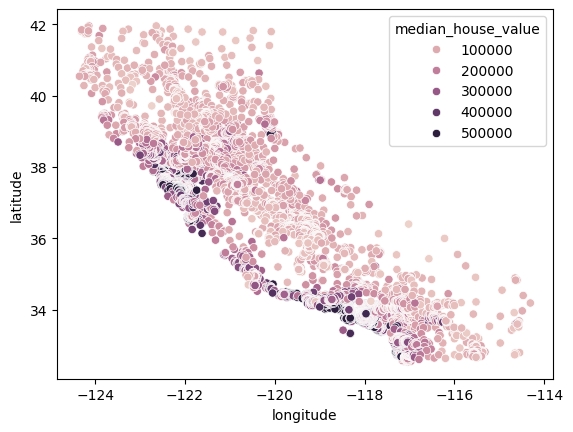

In [ ]:
#scatter plot del median income vs median house value
sns.scatterplot(data=df, x="longitude", y="latitude", hue="median_house_value")
plt.show()

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.




###11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?





In [ ]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16346
4087


R/ Está separando 20% de los datos del dataframe de manera aleatoria para utilizarlos como datos de prueba, permitiendo utilizarlos para probar la hipotesis (el modelo), así mismo evitando un sobreajuste.
Un problema que puede ocurrir es que no se mantengan proporciones iniciales como en el caso de 51.3% de mujeres y 48.7% de hombres, por lo que el conjunto de prueba puede estar sesgado y hace que este bloque de codigo no sea lo apropiado para el manejo de los datos.

###12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:



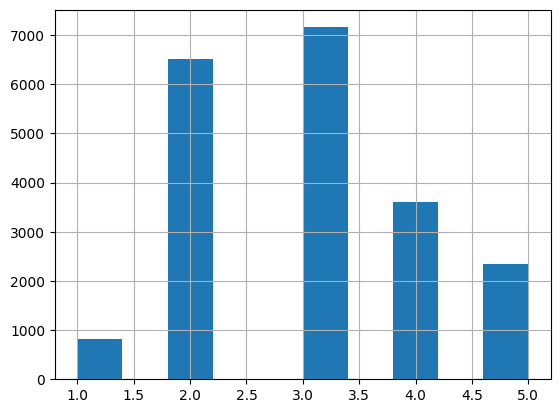

In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist();


La forma automatica de realizar la división puede ser la siguiente:


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
18052,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,<1H OCEAN,5
17555,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,<1H OCEAN,3
19195,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,<1H OCEAN,3
17808,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,<1H OCEAN,5
10265,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,<1H OCEAN,4


In [ ]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
18143,-122.06,37.34,20.0,3435.0,593.0,1293.0,553.0,6.7578,451400.0,<1H OCEAN,5
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,150800.0,NEAR OCEAN,3
8313,-118.13,33.77,37.0,4365.0,926.0,1661.0,868.0,5.3046,360700.0,NEAR OCEAN,4
8365,-118.35,33.97,26.0,1725.0,431.0,1130.0,404.0,3.2708,128100.0,<1H OCEAN,3
13188,-117.70,34.09,25.0,1719.0,331.0,1098.0,324.0,3.6250,121800.0,INLAND,3





Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.


In [ ]:
df["income_cat"].value_counts() / len(df)

print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

print(train_set["income_cat"].value_counts() / len(train_set))
print(test_set["income_cat"].value_counts() / len(test_set))

income_cat
3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: count, dtype: float64
income_cat
3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: count, dtype: float64
income_cat
3    0.352747
2    0.319161
4    0.175639
5    0.112138
1    0.040316
Name: count, dtype: float64
income_cat
3    0.340103
2    0.317592
4    0.181062
5    0.123318
1    0.037925
Name: count, dtype: float64


Como se puede observar con el primer metodo se mantienen las proporciones mucho mas que en el segundo, observe la diferencia en proporciones usando el primer metodo.

```
3    train: 0.350239 --> test: 0.350135
2    train: 0.318855 --> test: 0.318816
4    train: 0.176740 --> test: 0.176658
5    train: 0.114340 --> test: 0.114509
1    train: 0.039826 --> test: 0.039883
```
Mientras que en el caso totalmente aleatorio esas proporciones se diferencian mas, note como cambian para cada categoria:

```
3    train: 0.352747 --> test: 0.340103
2    train: 0.319161 --> test: 0.317592
4    train: 0.175639 --> test: 0.181062
5    train: 0.112138 --> test: 0.123318
1    train: 0.040316 --> test: 0.037925
```
Mientras mayor sea la diferencia en las proporciones entre mis datos de entrenamiento con mis datos de test voy a tener un mayor sesgo al generar mi modelo, ya que lo estaré entrenando con datos sesgados.

Un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:


In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039838,0.039883,0.038904,2.343711,0.113051
2,0.318847,0.318816,0.317348,0.470218,0.009787
3,0.350218,0.350135,0.354783,1.303667,0.023760
4,0.176724,0.176658,0.173232,1.975809,0.037478
5,0.114374,0.114509,0.115733,1.188213,0.118570


Se observa que el error en cada categoria es menor con el metodo de estratificación

###13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```






In [ ]:
df_train = strat_train_set.copy().reset_index(drop=True)
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]


# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.



In [ ]:
df.isnull().sum()

#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

q=pd.DataFrame(q)
q.isnull().sum()

,0
total_bedrooms,0



##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):

In [ ]:
from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

df_train_num = df_train.select_dtypes(include=['number'])

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19575240e+02,  3.56390609e+01,  2.86794935e+01,  2.64349168e+03,
        5.39510645e+02,  1.42772911e+03,  5.01013642e+02,  3.87020800e+00,
        2.07079816e+05,  5.43394299e+00,  2.12976050e-01,  3.06517452e+00])


##14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```



In [ ]:
imp_mean.statistics_

array([-1.19575240e+02,  3.56390609e+01,  2.86794935e+01,  2.64349168e+03,
        5.39510645e+02,  1.42772911e+03,  5.01013642e+02,  3.87020800e+00,
        2.07079816e+05,  5.43394299e+00,  2.12976050e-01,  3.06517452e+00])

Esta variable es un arreglo de medias de cada una de las columnas, el orden de los valores corresponde al orden de las columnas

In [ ]:
df_train_num.median()

,0
longitude,-118.510000
latitude,34.260000
housing_median_age,29.000000
total_rooms,2131.000000
total_bedrooms,435.000000
population,1168.000000
households,410.000000
median_income,3.529900
median_house_value,179900.000000
rooms_per_household,5.226415


A diferencia del anterior este no es un arreglo si no una Serie de pandas con la mediana de cada columna indicando claramente a cual columna corresponde la mediana.


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


In [ ]:
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)



# Manejo de texto y atributos categóricos
###15.  ¿Qué realizan las siguientes lineas de código?


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
0,<1H OCEAN
1,<1H OCEAN
2,<1H OCEAN
3,<1H OCEAN
4,<1H OCEAN


In [ ]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [ ]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

In [ ]:
housing_tr_.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.98,37.25,19.0,755.0,93.0,267.0,99.0,15.0000,500001.0,7.626263,0.123179,2.696970,1.0,0.0,0.0,0.0,0.0
1,-121.87,37.33,37.0,3137.0,685.0,2048.0,651.0,3.0156,270300.0,4.818740,0.218361,3.145929,1.0,0.0,0.0,0.0,0.0
2,-122.68,38.44,36.0,1311.0,259.0,648.0,268.0,3.4545,161200.0,4.891791,0.197559,2.417910,1.0,0.0,0.0,0.0,0.0
3,-121.87,37.41,17.0,3719.0,588.0,2089.0,561.0,6.7867,273700.0,6.629234,0.158107,3.723708,1.0,0.0,0.0,0.0,0.0
4,-117.85,33.90,25.0,1548.0,256.0,811.0,263.0,5.2037,242200.0,5.885932,0.165375,3.083650,1.0,0.0,0.0,0.0,0.0



# Escalamiento de variables

###16. Las variables pueden ser escaladas como sigue:




In [ ]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.








In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
# Limpieza
median = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median)

# Quitar Outliers
df = remove_outliers(df, 'median_house_value').reset_index(drop=True)

# Atributos Categoricos
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., float("inf")],
                          labels=[1, 2, 3, 4, 5])

# Sampling
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

df_train = strat_train_set.copy().reset_index(drop=True)
df_test = strat_test_set.copy().reset_index(drop=True)

# Imputer
df_train_num = df_train.select_dtypes(include=['number'])
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num)
X = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

df_test_num = df_test.select_dtypes(include=['number'])
X_test_imp = imp_mean.transform(df_test_num)
housing_test_num = pd.DataFrame(X_test_imp, columns=df_test_num.columns)

#Manejo de texto y atributos categóricos
housing_cat = df_train[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_test_cat = df_test[["ocean_proximity"]]
housing_cat_1hot_test = cat_encoder.transform(housing_test_cat)

df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
df_cat_1hot_test = pd.DataFrame(housing_cat_1hot_test, columns=cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
housing_tr_test = housing_test_num.join(df_cat_1hot_test)

cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]

#Escalamiento de variables
housing_scale=housing_tr_[cols]
housing_scale_test=housing_tr_test[cols]

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)
X_test = scaler.transform(housing_scale_test)

housing_train = pd.DataFrame(X, columns = cols)
housing_test = pd.DataFrame(X_test, columns=cols)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Etiquetas
y_train = df_train["median_house_value"]
y_test = df_test["median_house_value"]
lin_reg = LinearRegression()
lin_reg.fit(housing_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones
y_pred_test = lin_reg.predict(housing_test)

# Función para evaluar el modelo
print(f"Evaluación del modelo:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"  R²  : {r2_score(y_test, y_pred_test):.3f}")

Evaluación del modelo:
  RMSE: 62761.32
  R²  : 0.631


18. ¿que puede concluir respecto al modelo empleado?

La evaluación del modelo lineal mostró un RMSE de 62761 y un R² de 0.631, lo cual indica que, el modelo logra captar parte de la estructura de los datos, pero no toda. El error igual es alto.

2. ¿El modelo de regresión lineal es valido para lo construido,

No creo que sea suficientemente valido pues el error sigue siendo alto.

3. ¿qué informacion nos da el score?

El score (R²) indica que tan bueno es el modelo para explicar la variación de los datos, es un valor que va de 0 a 1, mientras mas cerca a 1 mejor el modelo. Lo que indica un score de 0.631 es que el modelo explica un 63.1% de la variabilidad del precio de vivienda en los datos de prueba.

4. ¿Puede ser ajustado a otro modelo?

Si, alguna de las opciones que podemos usar son randomforest, gradient boosting regressor, Kneighboors, etc. Probemos algunos

5. ¿Como puede autmatizar todo el proceso empleando pipelines?

Veamos:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Columnas numéricas y categóricas
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Pipelines por tipo
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(sparse_output=False))
])

# Unión de todo
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# Pipeline completo con modelo
full_model = Pipeline([
    ("preprocess", full_pipeline),
    ("regressor", LinearRegression())
])

# Entrenamiento
X_train = df_train[num_attribs + cat_attribs]
y_train = df_train["median_house_value"]

full_model.fit(X_train, y_train)

# Evaluación
X_test = df_test[num_attribs + cat_attribs]
y_test = df_test["median_house_value"]
y_pred = full_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 3938983236.4961424
R2: 0.6309125818061903


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Pipeline completo con modelo
full_model = Pipeline([
    ("preprocess", full_pipeline),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenamiento
X_train = df_train[num_attribs + cat_attribs]
y_train = df_train["median_house_value"]

full_model.fit(X_train, y_train)

# Evaluación
X_test = df_test[num_attribs + cat_attribs]
y_test = df_test["median_house_value"]
y_pred = full_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 1898963034.0780332
R2: 0.8220649031964898


In [ ]:
# Pipeline completo con modelo
full_model = Pipeline([
    ("preprocess", full_pipeline),
    ("regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Entrenamiento
X_train = df_train[num_attribs + cat_attribs]
y_train = df_train["median_house_value"]

full_model.fit(X_train, y_train)

# Evaluación
X_test = df_test[num_attribs + cat_attribs]
y_test = df_test["median_house_value"]
y_pred = full_model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 2545587271.2955937
R2: 0.7614754424328873


En ambos casos el resultado es mucho mejor, siendo superior el random forest en cuanto asl score, con un sobresaliente 0.82.
